<a href="https://colab.research.google.com/github/GauravPatel89/temp222/blob/master/Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

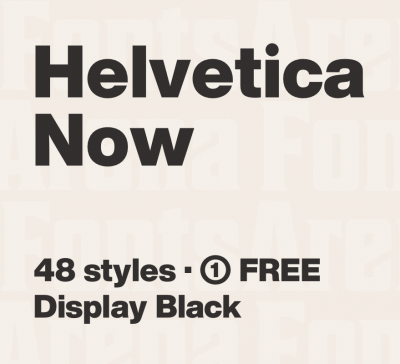

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

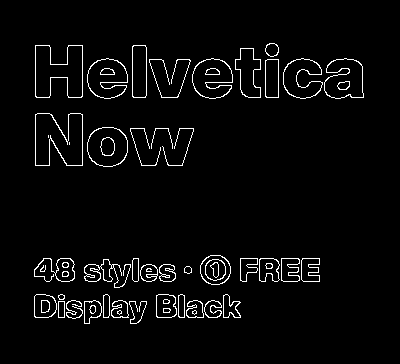

In [5]:
cv2_imshow(edges)

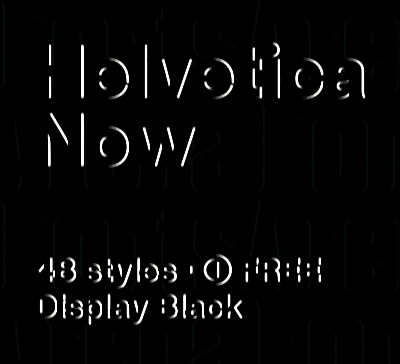

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# **Horizontal Edge Detector**

Edge detection in image is similar to differentiation in 1D signal. There can be number of kernels to perform this operation. Two such kernels for horizontal edge detection are implemented here


Kernel 1:

-1 -1 -1; 0  0  0; 1  1  1

If we traverse the image from top to bottom, Row 0 (-1,-1,-1) of this kernel will deemphasise the pixels while row 2 (1,1,1) will emphasize the pixels.  Thus it should detect onset of edge i.e. pixel value wise change from smaller values(darker values) to larger values (brighter values) but in our case the text or foreground is darker and background brighter hence the kernel detects end of edge i.e. bottom horizontal edges of the fonts as seen in the output image.

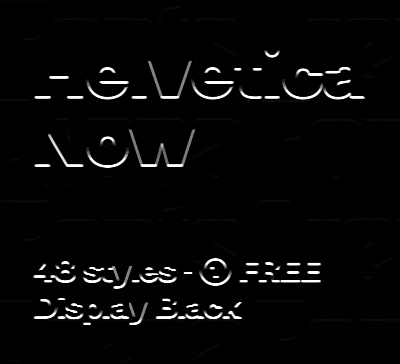

In [7]:
#Horizontal Edge Detector: Kernel1
kernelHorz1 = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
#kernelHorz = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
ImageHorzEdge1 = cv2.filter2D(image,-1,kernelHorz1)
cv2_imshow(ImageHorzEdge1)


Kernel 2:

1 1 1; 0  0  0; -1  -1  -1

This is reverse of kernel1.
If we traverse the image from top to bottom, Row 0 (1,1,1) this kernel will emphasise the pixels while row 2 (-1,-1,-1) will deemphasize the pixels. Thus it should detect end of edge i.e. pixel value wise change from larger values (brighter values) to smaller values(darker values) but in our case the text or foreground is darker and background brighter hence the kernel detects onset of edge i.e. top horizontal edges of the fonts as seen in the output image.

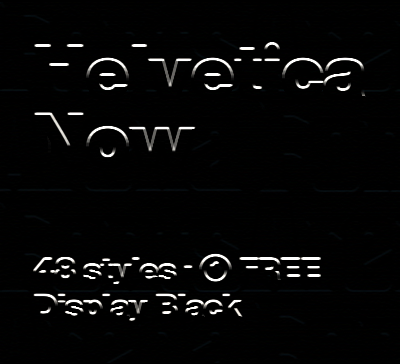

In [8]:
#Horizontal Edge Detector: Kernel2
kernelHorz2 = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
ImageHorzEdge2 = cv2.filter2D(image,-1,kernelHorz2)
cv2_imshow(ImageHorzEdge2)

#**45 Degree Edge Detector**

Similar to horizontal edge detection here also there can be number of kernels to achieve this task. Following are two

Kernel 1:

-1 -1 0; -1 0 1; 0 1 1

If we traverse the image from top to bottom, left top part (with -1s) of this kernel will deemphasise the pixels while right bottom part (with 1s) will emphasize the pixels. Thus it should detect onset of edge i.e. pixel value wise change from smaller values(darker values) to larger values (brighter values) but in our case the text or foreground is darker and background brighter hence the kernel detects end of edge i.e. bottom parts of 45 degree edges of the fonts as seen in the output image(eg.V,W).

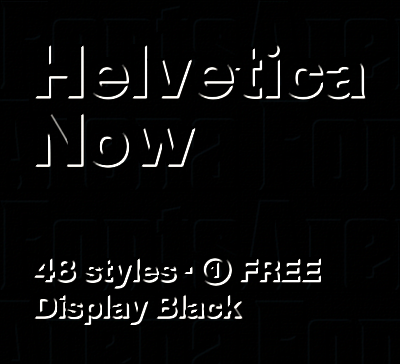

In [9]:
# 45 Degree Angle Detector 
kernel45deg1 = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])
Image45degEdge1 = cv2.filter2D(image,-1,kernel45deg1)
cv2_imshow(Image45degEdge1)

Kernel 2:

1 1 0; 1 0 -1; 0 -1 -1

If we traverse the image from top to bottom, left top part (with 1s) of this kernel will emphasise the pixels while right bottom part (with -1s) will deemphasize the pixels. Thus it should detect end of edge i.e. pixel value wise change from larger values (brighter values) to smaller values(darker values) but in our case the text or foreground is darker and background brighter hence the kernel detects onset of edge i.e. top parts of 45 degree edges of the fonts as seen in the output image(eg.V,W).


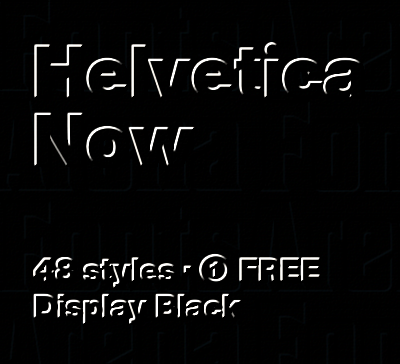

In [10]:
# 45 Degree Angle Detector 
kernel45deg2 = np.float32([[1,1,0],[1,0,-1],[0,-1,-1]])
Image45degEdge2 = cv2.filter2D(image,-1,kernel45deg2)
cv2_imshow(Image45degEdge2)

#**Blur Kernel**
Blurring in image domain is similar to applying average filter in 1 D domain. To perform averaging we have to simply add all the pixels falling under the kernel (3x3 in our case) then divide the sum by number of pixel (9 in our case). This can accomplished by following kernel.

1/9 1/9 1/9

1/9 1/9 1/9

1/9 1/9 1/9

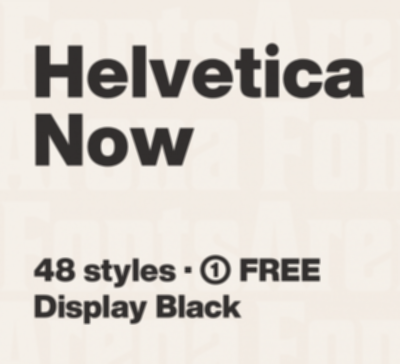

In [12]:
# Blur kernel 
kernelBlur = (1/9)*np.float32([[1,1,1],[1,1,1],[1,1,1]])
ImageBlur = cv2.filter2D(image,-1,kernelBlur)
cv2_imshow(ImageBlur)

#**Sharpen Kernel**
Image sharpening can be accomplished by emphasizing the edges of the foreground objects. We can break this into two steps
1. Find edges in the image
2. Add the edges to original image

Step 1. Find edge
Kernel

-1 -1 -1

-1 8 -1

-1 -1 -1

Since sum of coefficients of this kernel is 0 it will give 0 for constant areas of the image. For areas of transitions center pixel will be emphasized while surrounding pixels deemphasized. This way it will detect an edge.



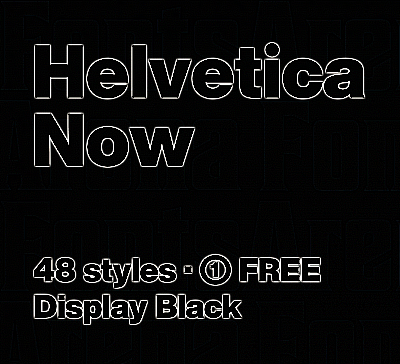

In [15]:
# Sharpen kernel step1
kernelSharpenSt1 = np.float32([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

ImageSharpenSt1 = cv2.filter2D(image,-1,kernelSharpenSt1)
cv2_imshow(ImageSharpenSt1)

Step 2. Add edge image to original image
We can get unchanged image by identity kernel ([0,0,0],[0,1,0],[0,0,0]). so to combine it with edge image obtained above we can simply combine the kernel as

[[0,0,0],[0,1,0],[0,0,0]] + [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] =

-1 -1 -1

-1 9 -1 

-1 -1 -1

The output can be seen below. The output image is visibly sharper than original image

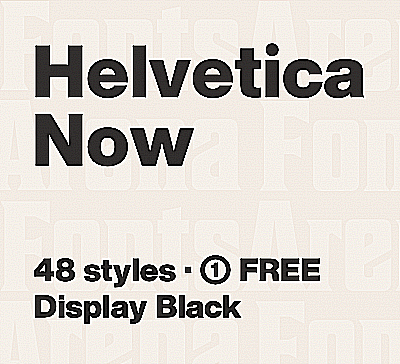

In [18]:
# Sharpen kernel 
kernelSharpen = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

ImageSharpen = cv2.filter2D(image,-1,kernelSharpen)
cv2_imshow(ImageSharpen)

#**Identity Kernel**
Identity kernel should leave the image unchanged. If we look at the convolution operation of the kernel at each step multiplies underlying pixel values with corresponding kernel coefficients the sums them and places the result at center pixel. So if we want our image to remain unchanged (multiplied with 1) we must have a kernel wherein the center pixel is unchanged while neighbouring pixels are discarded (multiplied by 0).  
Follwing kernel will do this task

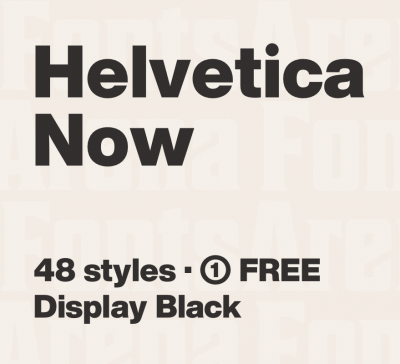

(364, 400, 3)


In [17]:
# Identity kernel 
kernelIdentity = np.float32([[0,0,0],[0,1,0],[0,0,0]])

ImageIdentity = cv2.filter2D(image,-1,kernelIdentity)
cv2_imshow(ImageIdentity)